# Importing Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import RobustScaler , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import f1_score , confusion_matrix , classification_report , roc_auc_score , roc_curve , precision_score , recall_score , balanced_accuracy_score , accuracy_score

import warnings
warnings.filterwarnings(action="ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option("display.max_columns" , None)

# Description
* **Age** - age of the customer.
* **Age Group** - what age group does the customer lie 
(10 - 19 = 1
20 - 29 = 2
30 - 39 = 3
40 - 49 = 4
50 - 59 = 5
60 - 69 = 6
70 - 79 = 7
80 - 89 = 8
90 - 99 = 9)
* **Eligible** - if the customer is eligible for the talk or not.
* **Job** - what does the customer do?
* **Salary** - salary of the customer
* **Marital** - married or not?
* **Education** - level of education complited
* **Marital Education** - married or not- education
* **Targeted** - if the customer or being targeted or not
* **Defult** - if the customer in default list or not
* **Balance** - remaining balance in their accounts
* **Housing** - housing
* **Loan** - has prior loan or not
* **Contact** - source of this information
* **Day** - today's date
* **Month** - Month
* **Duration** - number of days
* **Campaign** - marketing campaign
* **Pdays** - number of days that passed by after the client was last contacted
* **Previous** - previous response
* **outcome** - outcome of the previous marketing campaign
* **y** - predict if the customer will buy the product or not!
* **response** - response of the actor

# Imporing Dataset

In [2]:
df = pd.read_csv("bank-marketing.csv")
df.rename(columns = lambda x : str(x).capitalize() , inplace = True)
df.drop(columns = ["Response"] , inplace= True) # Same variable with Y
df.tail()

Age  Age group Eligible           Job  Salary   Marital  Education  \
45206   51          5        Y    technician   60000   married   tertiary   
45207   71          7        N       retired   55000  divorced    primary   
45208   72          7        N       retired   55000   married  secondary   
45209   57          5        Y   blue-collar   20000   married  secondary   
45210   37          3        Y  entrepreneur  120000   married  secondary   

       Marital-education Targeted Default  Balance Housing Loan    Contact  \
45206   married-tertiary      yes      no      825      no   no   cellular   
45207   divorced-primary      yes      no     1729      no   no   cellular   
45208  married-secondary      yes      no     5715      no   no   cellular   
45209  married-secondary      yes      no      668      no   no  telephone   
45210  married-secondary      yes      no     2971      no   no   cellular   

       Day Month  Duration  Campaign  Pdays  Previous Poutcome    Y  
45206   17   nov       977         3     -1         0  unknown  yes  
45207   17   nov       456         2     -1         0  unknown  yes  
45208   17   nov      1127         5    184         3  success  yes  
45209   17   nov       508         4     -1         0  unknown   no  
45210   17   nov       361         2    188        11    other   no

# Checking if there are null values in the dataset or not

In [3]:
for x in df.select_dtypes(exclude="number").columns.to_list() : 
    df.loc[df[x] == "unknown" , x] = np.nan # Replacing unknonk with NaN valus
df.dropna(axis = 1 , thresh=df.shape[0]*0.70 , inplace = True) # Applying thresholding method
df.isnull().sum()

Age                      0
Age group                0
Eligible                 0
Job                    288
Salary                   0
Marital                  0
Education             1857
Marital-education        0
Targeted                 0
Default                  0
Balance                  0
Housing                  0
Loan                     0
Contact              13020
Day                      0
Month                    0
Duration                 0
Campaign                 0
Pdays                    0
Previous                 0
Y                        0
dtype: int64

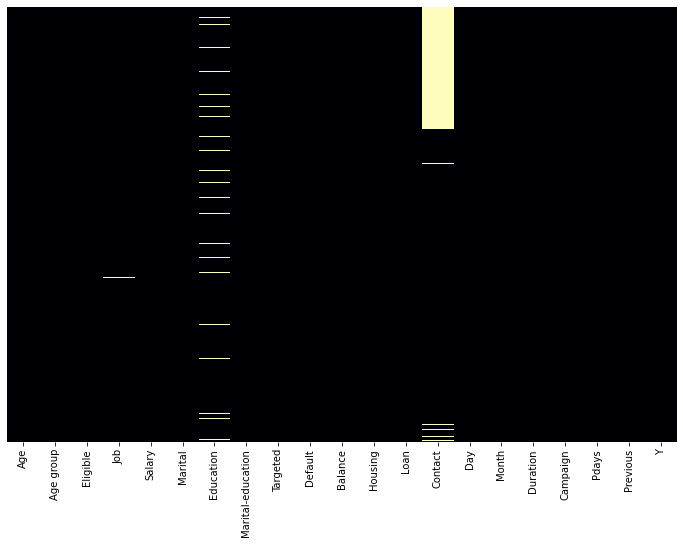

In [4]:
sns.heatmap(data = df.isnull() , cmap = "magma" , yticklabels = False , cbar = False)
plt.show()

# Chechin if there are duplicate values in the dataset or not

In [5]:
print("There are {} duplicate values in the dataset".format(df.duplicated().sum()))

There are 0 duplicate values in the dataset


# Comparing jobs by salary

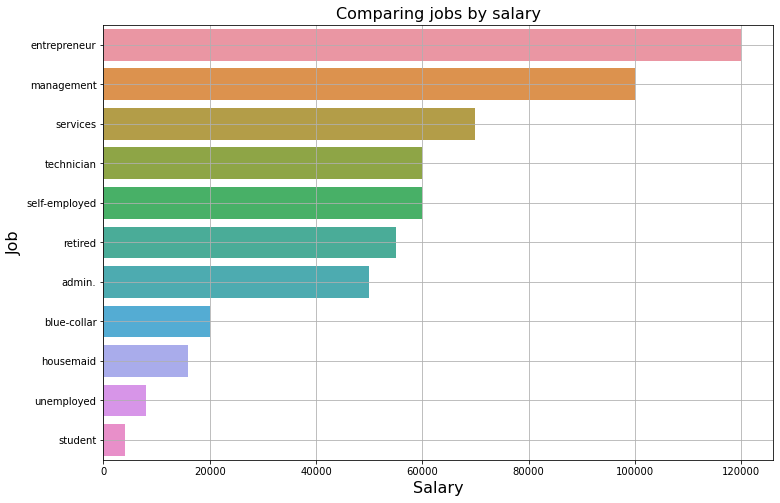

In [6]:
sns.barplot(y = df.sort_values(by = "Salary" , ascending=False)["Job"] , x = df.sort_values(by = "Salary" , ascending=False)["Salary"] , data = df)
plt.title("Comparing jobs by salary" , fontsize = 16)
plt.xlabel("Salary" , fontsize = 16)
plt.ylabel("Job" , fontsize = 16)
plt.grid()
plt.show()

# Ratio of Dependent Variable

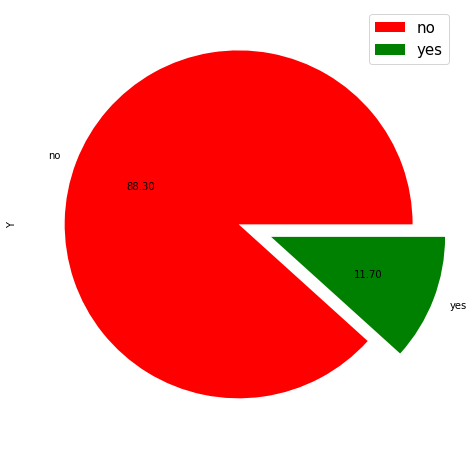

In [7]:
df["Y"].value_counts().plot(kind = "pie" , autopct = "%.2f" , explode = [0.0 , 0.2] , colors = ["red" , "green"])
plt.legend(loc = "best" , fontsize = 15)
plt.show()

# Checking if there are outliers in the dataset or not

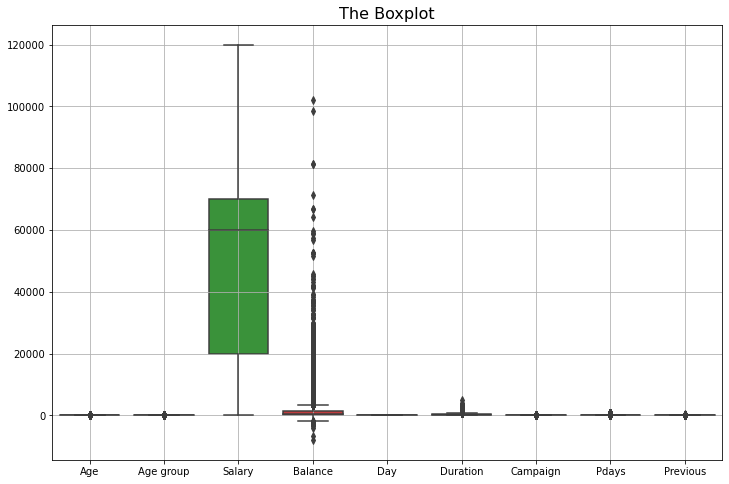

In [8]:
sns.boxplot(data = df)
plt.title("The Boxplot" , fontsize = 16)
plt.grid()
plt.show()
# There are outliers in the dataset so I will apply RobustScaler

# The Proportion of each value in Marital Status column 

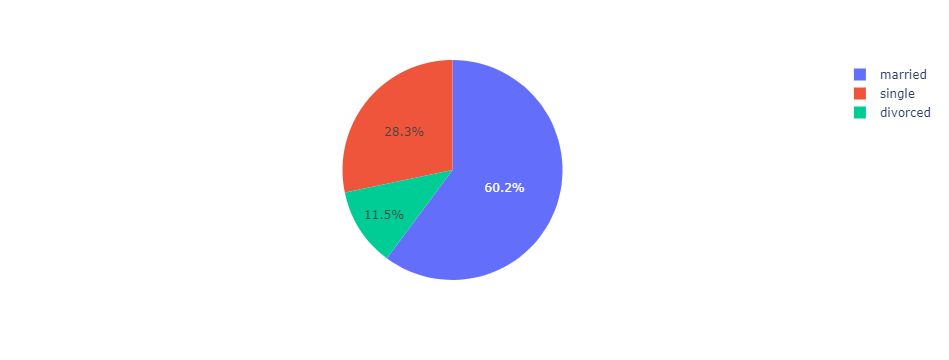

In [9]:
import plotly.express as px

px.pie(data_frame=df , names = "Marital")

# The correlation between the variables of dataset

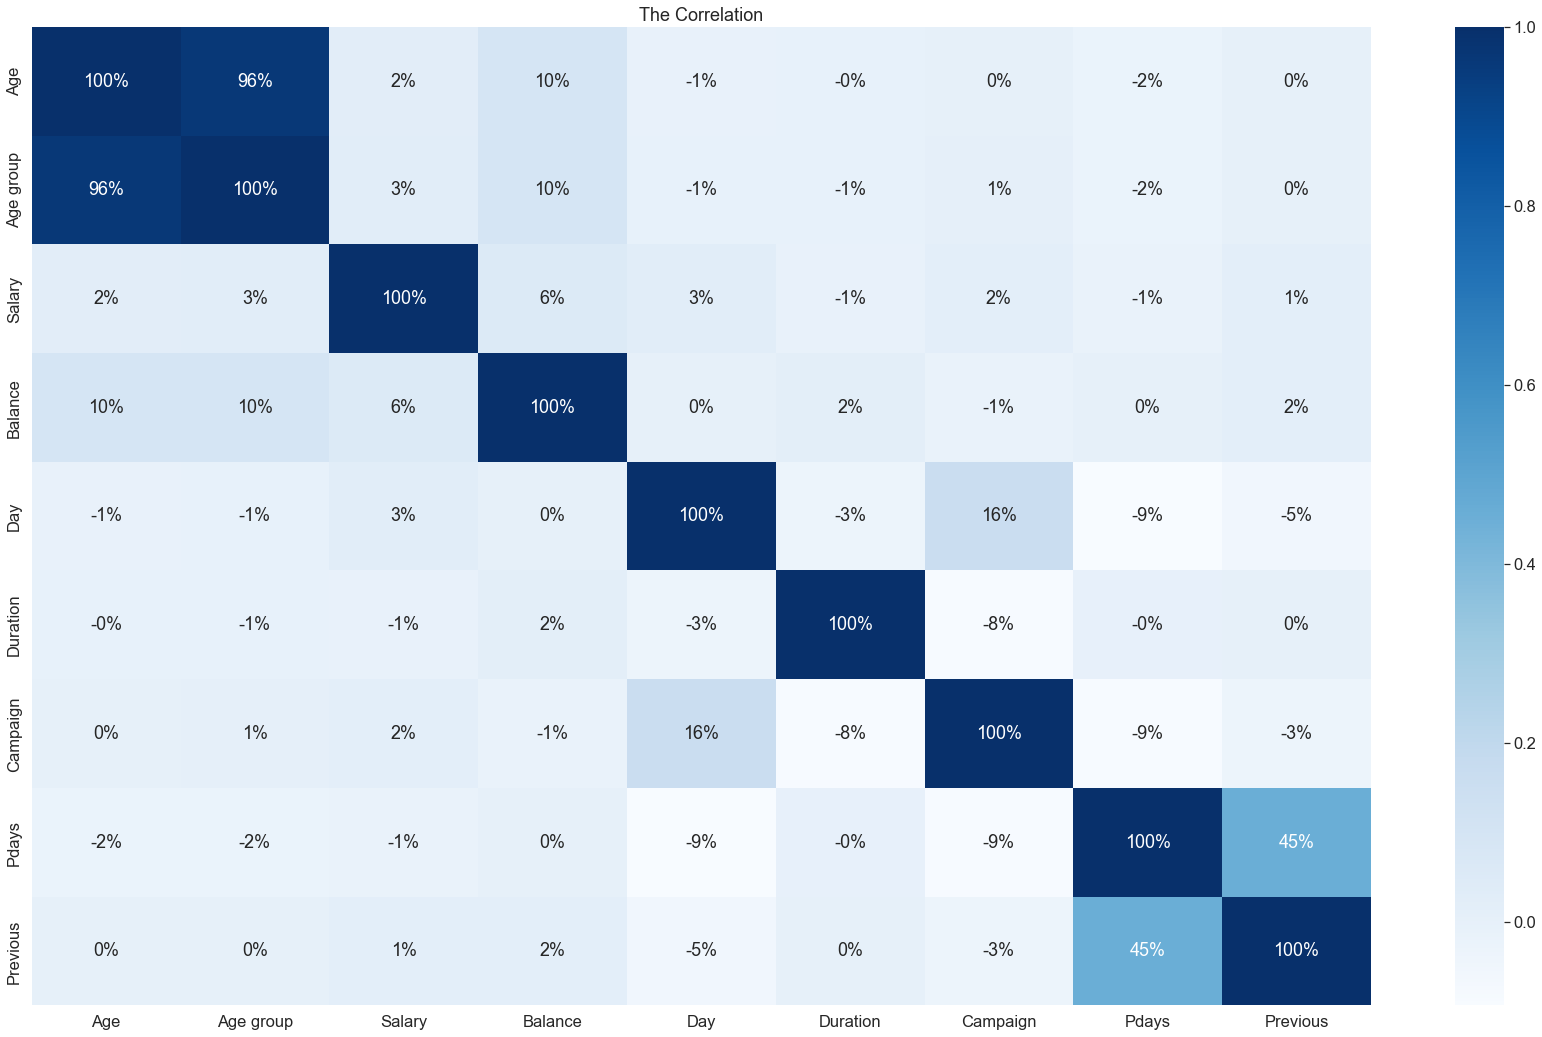

In [10]:
sns.set(font_scale = 1.5 , palette = "bright")
plt.figure(figsize = (30,18))
sns.heatmap(data = df.corr() , cmap = plt.cm.Blues , annot = True , fmt = ".0%")
plt.title("The Correlation")
plt.show()

# Converting ordinal variables' dtypes to numeric

In [11]:
df["Education"] = df["Education"].map({"primary" : 0 , "secondary" : 1 , "tertiary" : 2})
df["Job"] = df["Job"].map({"uneployed" : 0 , "student" : 1 , "housemaid" : 2 , "self-employed" : 3 , "services" : 4 , "blue-collar" : 5 , "technician" : 6  , "admin" : 7, "management" : 8 ,"entrepreneur" : 9 , "retired" : 10})

# Converting Dependent variable to numeric

In [12]:
df["Y"] = df["Y"].map({"no" : 0 , "yes" : 1})

# Splitting dataset to X and y

In [13]:
X = df.drop(columns = ["Y"])
y = df["Y"]

# Splitting dataset to train and test set

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Automate the metrics , confussion matrix and Roc Curve

In [15]:
def metrics_func(y_pred_train , y_pred_test) : 
    
    roc_train = roc_auc_score(y_train , y_pred_train)
    gini_train = (2*roc_train)-1
    f1_train = f1_score(y_train , y_pred_train)
    prec_train = precision_score(y_train , y_pred_train)
    rec_train = recall_score(y_train , y_pred_train)
    balance_train = balanced_accuracy_score(y_train , y_pred_train)
    accuracy_train = accuracy_score(y_train , y_pred_train)
    
    roc_test = roc_auc_score(y_test , y_pred_test)
    gini_test = (2*roc_test)-1
    f1_test = f1_score(y_test , y_pred_test)
    prec_test = precision_score(y_test , y_pred_test)
    rec_test = recall_score(y_test , y_pred_test)
    balance_test = balanced_accuracy_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test , y_pred_test)
    
    print("<<< The metrics for Train set >>>")
    print("The Roc auc score is {:.2%}".format(roc_train))
    print("The Gini score is {:.2%}".format(gini_train))
    print("The F1 score is {:.2%}".format(f1_train))
    print("The Precision Score is {:.2%}".format(prec_train))
    print("The Recall score is {:.2%}".format(rec_train))
    print("The Balance accuracy score is {:.2%}".format(balance_train))
    print("The Accuracy score is {:.2%}".format(accuracy_train))
    
    print()
    
    print("<<< The metrics for Ttest set >>>")
    print("The Roc auc score is {:.2%}".format(roc_test))
    print("The Gini score is {:.2%}".format(gini_test))
    print("The F1 score is {:.2%}".format(f1_test))
    print("The Precision Score is {:.2%}".format(prec_test))
    print("The Recall score is {:.2%}".format(rec_test))
    print("The Balance accuracy score is {:.2%}".format(balance_test))
    print("The Accuracy score is {:.2%}".format(accuracy_test))

In [16]:
def confussion_matrix_func(y_pred_train , y_pred_test) : 
    
    cm_train = confusion_matrix(y_train , y_pred_train)
    cm_test = confusion_matrix(y_test , y_pred_test)
    
    plt.figure(figsize = (30,18))
    plt.subplot(2,3,1)
    sns.heatmap(data = cm_train , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"] , annot = True , fmt = ".5g" , cmap = plt.cm.Blues)
    plt.title("The Confussion Matrix for Train set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Prediction" , fontsize = 18)
    plt.subplot(2,3,2)
    upper_case = cm_train[0]/np.sum(cm_train , axis = 1)[0]
    lower_case = cm_train[1]/np.sum(cm_train , axis = 1)[1]
    final = np.vstack([upper_case , lower_case])
    sns.heatmap(data = final , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["False" , "Yes"] , annot = True , fmt = ".0%")
    plt.title("The Confussion Matrix for Train set with Recall Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("Teh Prediction" , fontsize= 18)
    plt.subplot(2,3,3)
    left_stack = cm_train[:,0]/np.sum(cm_train , axis = 0)[0]
    right_stack = cm_train[:,1]/np.sum(cm_train , axis = 0)[1]
    final_stack = np.stack([left_stack , right_stack])
    sns.heatmap(data = final_stack , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["False" , "Yes"] , annot = True , fmt =".0%")
    plt.title("The Confussion Matrix for Train set with Precision Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Prediction" , fontsize = 18)
    plt.subplot(2,3,4)
    sns.heatmap(data = cm_test , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"] , annot = True , fmt = ".5g" , cmap = plt.cm.Blues)
    plt.title("The Confussion Matrix for Test set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Prediction" , fontsize = 18)
    plt.subplot(2,3,5)
    upper_case = cm_test[0]/np.sum(cm_test , axis = 1)[0]
    lower_case = cm_test[1]/np.sum(cm_test , axis = 1)[1]
    final = np.vstack([upper_case , lower_case])
    sns.heatmap(data = final , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["False" , "Yes"] , annot = True , fmt = ".0%")
    plt.title("The Confussion Matrix for Test set with Recall Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("Teh Prediction" , fontsize= 18)
    plt.subplot(2,3,6)
    left_stack = cm_test[:,0]/np.sum(cm_test , axis = 0)[0]
    right_stack = cm_test[:,1]/np.sum(cm_test , axis = 0)[1]
    final_stack = np.stack([left_stack , right_stack])
    sns.heatmap(data = final_stack , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["False" , "Yes"] , annot = True , fmt =".0%")
    plt.title("The Confussion Matrix for Test set with Precision Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Prediction" , fontsize = 18)
    plt.show()

In [17]:
def roc_curve_func(y_pred_train , y_pred_test , y_pred_proba_train , y_pred_proba_test) : 
    
    roc_train = roc_auc_score(y_train , y_pred_train)
    roc_test = roc_auc_score(y_test , y_pred_test)
    
    fpr, tpr, _ = roc_curve(y_train , y_pred_proba_train)
    plt.plot(fpr , tpr, label = f"Our Model with {np.round(roc_train , 2)} Roc auc score")
    plt.plot([0,1] , [0,1] , label = "The Random Model")
    plt.title("The Roc Curve for Train set" , fontsize = 16)
    plt.xlabel("The False Positive Rate" , fontsize= 16)
    plt.ylabel("The True Positive Rate" , fontsize = 16)
    plt.grid()
    plt.legend(loc = "best")
    plt.show()
    
    print()
    
    fpr, tpr, _  = roc_curve(y_test , y_pred_proba_test)
    plt.plot(fpr,tpr, label = f"Our Model with {np.round(roc_test , 2)} Roc auc score")
    plt.plot([0,1] , [0,1] , label = "The Random Model")
    plt.title("The Roc Curve for Test Set" , fontsize = 16)
    plt.xlabel("The False Positive Rate" , fontsize = 16)
    plt.grid()
    plt.legend(loc = "best")
    plt.show()

# Creating list of variables according to their dtypes

In [18]:
numeric_columns = ["Age" , "Salary" , "Balance" , "Day" , "Duration" , "Campaign" , "Pdays" , "Previous"]
ordinal_columns = ["Job" , "Education" , "Age group"]
nominal_columns = [x for x in X_train.select_dtypes(exclude="number").columns.to_list()]

# Creating pipelines for each dtypes

In [19]:
pipe_numeric = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="median")) , (RobustScaler()))
pipe_ordinal = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")))
pipe_nominal = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")) , (OneHotEncoder(handle_unknown="ignore")))

# Combining pipelines with transformer function

In [20]:
transformer = make_column_transformer((pipe_numeric , numeric_columns),
            (pipe_ordinal , ordinal_columns),
            (pipe_nominal , nominal_columns))

# Creating LogisticRegression model

In [21]:
model = make_pipeline(transformer , SequentialFeatureSelector(estimator=LogisticRegression() , scoring="accuracy" , cv = 10 , n_jobs=-1) , LogisticRegression())
model.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Salary', 'Balance',
                                                   'Day', 'Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))])

# Score function for Logistic Regression

In [22]:
train_score = model.score(X_train , y_train)
test_score = model.score(X_test , y_test)

print("The train score is {:.2%}".format(train_score))
print("The test score is {:.2%}".format(test_score))

The train score is 89.48%
The test score is 88.89%


# Metrics for Logistic Regression

In [23]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
metrics_func(y_pred_train = y_pred_train , y_pred_test = y_pred_test)

<<< The metrics for Train set >>>
The Roc auc score is 60.68%
The Gini score is 21.37%
The F1 score is 33.84%
The Precision Score is 62.69%
The Recall score is 23.18%
The Balance accuracy score is 60.68%
The Accuracy score is 89.48%

<<< The metrics for Ttest set >>>
The Roc auc score is 60.74%
The Gini score is 21.49%
The F1 score is 33.93%
The Precision Score is 60.00%
The Recall score is 23.65%
The Balance accuracy score is 60.74%
The Accuracy score is 88.89%


# Confussion Matrices for Logistic Regression

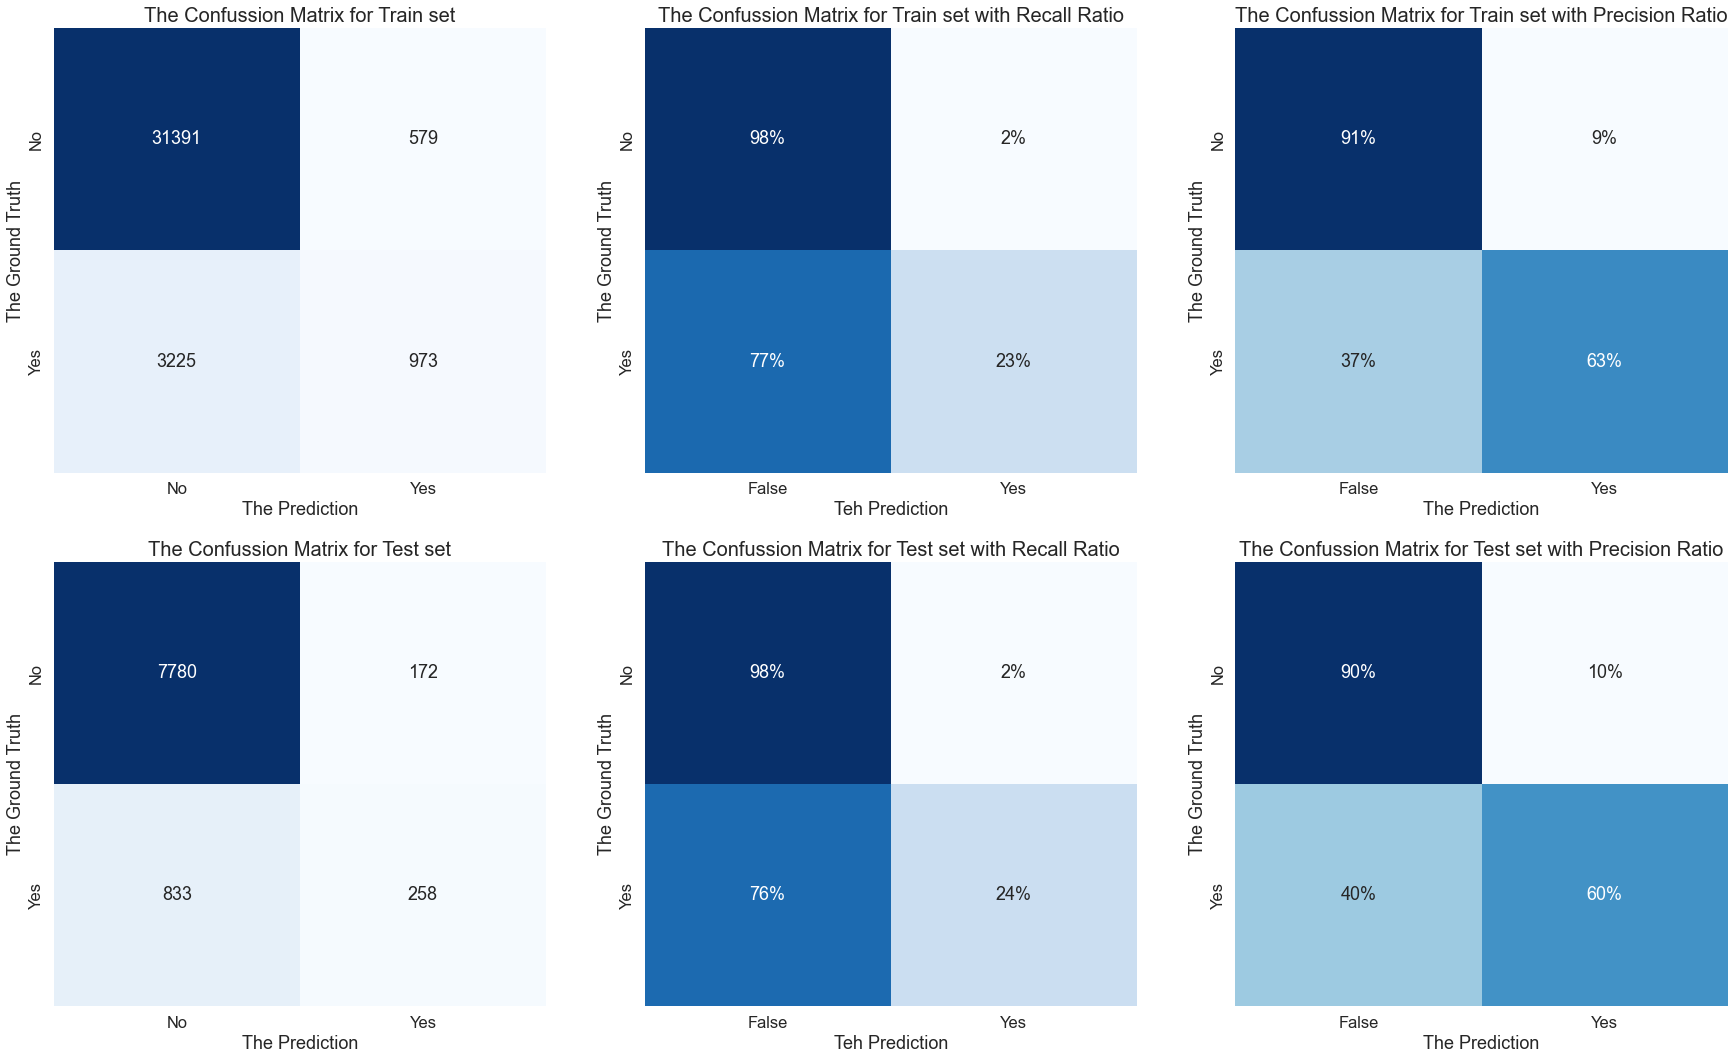

In [24]:
confussion_matrix_func(y_pred_train = y_pred_train , y_pred_test= y_pred_test)

# Roc Curve for Logistic Regression

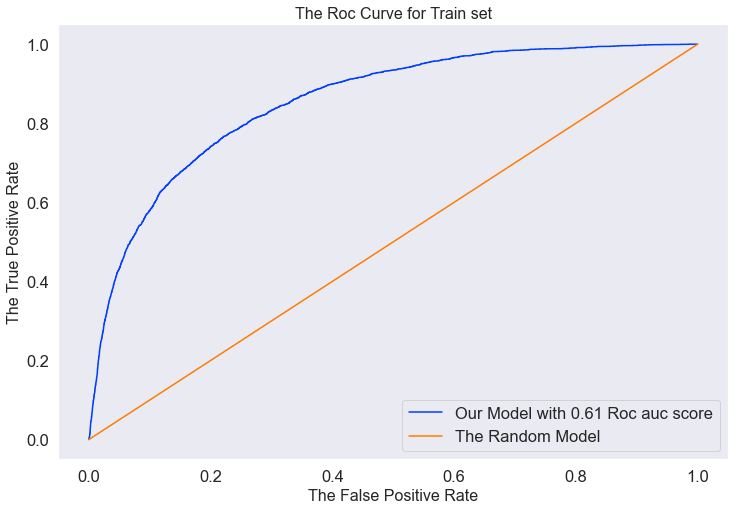

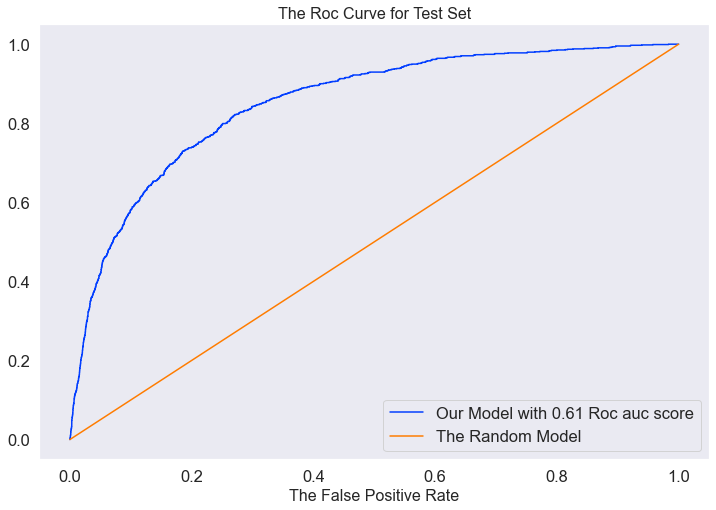

In [25]:
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

roc_curve_func(y_pred_train , y_pred_test , y_pred_proba_train , y_pred_proba_test)

# Creating model with XGBoost

In [26]:
from xgboost import XGBClassifier
model_xg = make_pipeline(transformer , SequentialFeatureSelector(estimator=XGBClassifier() , scoring="accuracy" , cv = 10 , n_jobs=-1) , XGBClassifier())
model_xg.fit(X_train , y_train)

[01:15:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Salary', 'Balance',
                                                   'Day', 'Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))])

# Score function for XGBoost

In [27]:
train_score = model_xg.score(X_train , y_train)
test_score = model_xg.score(X_test , y_test)

print("The train score is {:.2%}".format(train_score))
print("The test score is {:.2%}".format(test_score))

The train score is 93.85%
The test score is 90.39%


# Metrics for XGBoost

In [28]:
y_pred_train = model_xg.predict(X_train)
y_pred_test = model_xg.predict(X_test)
metrics_func(y_pred_train = y_pred_train , y_pred_test = y_pred_test)

<<< The metrics for Train set >>>
The Roc auc score is 79.18%
The Gini score is 58.37%
The F1 score is 69.41%
The Precision Score is 82.18%
The Recall score is 60.08%
The Balance accuracy score is 79.18%
The Accuracy score is 93.85%

<<< The metrics for Ttest set >>>
The Roc auc score is 71.17%
The Gini score is 42.33%
The F1 score is 53.50%
The Precision Score is 64.27%
The Recall score is 45.83%
The Balance accuracy score is 71.17%
The Accuracy score is 90.39%


# Confussion matrix for XGboost

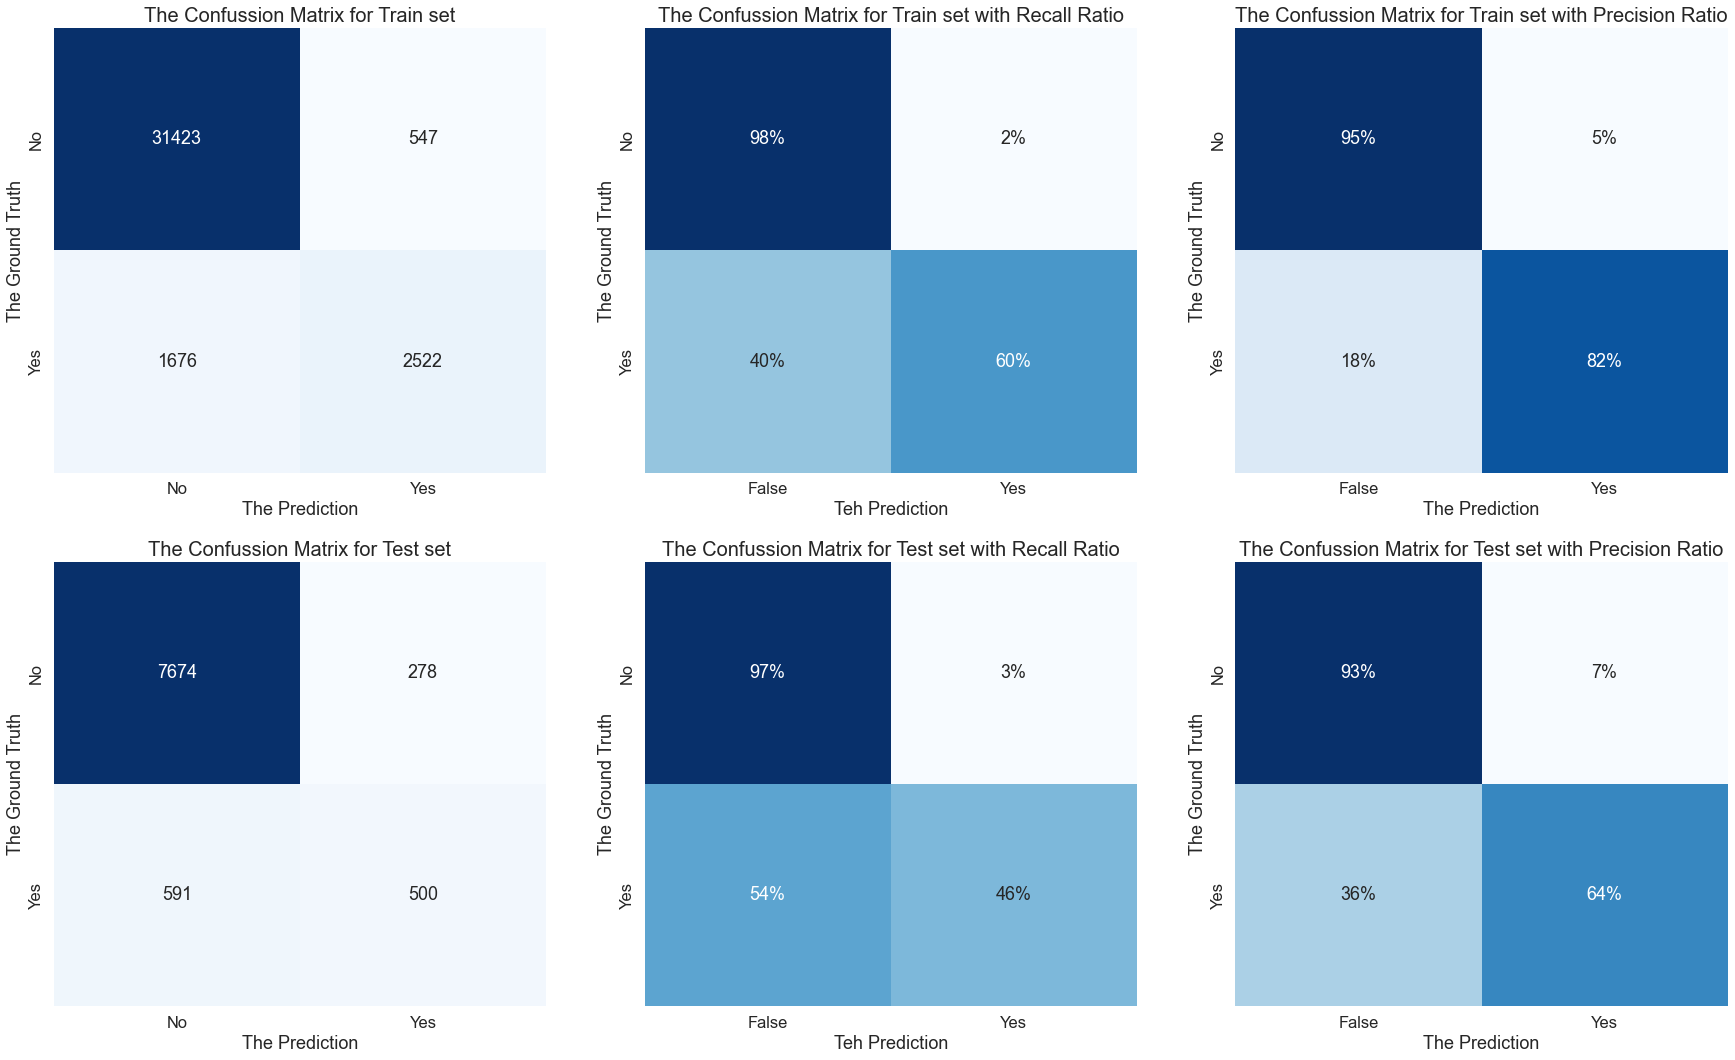

In [29]:
confussion_matrix_func(y_pred_train = y_pred_train , y_pred_test= y_pred_test)

# Roc Curve for Xgboot

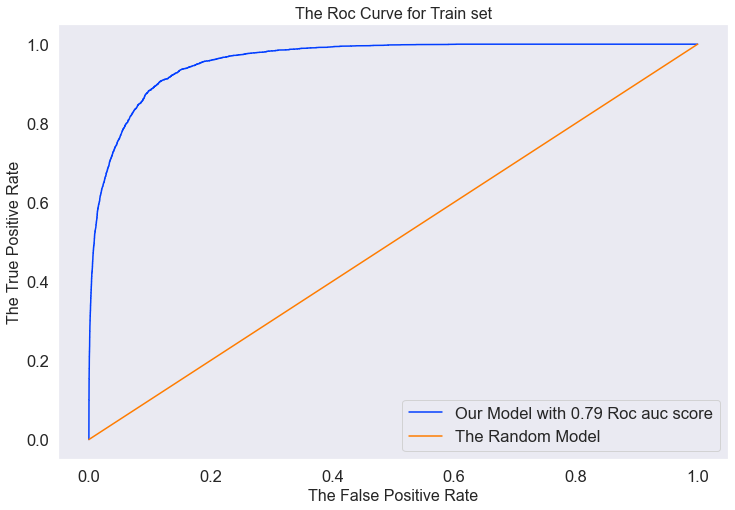

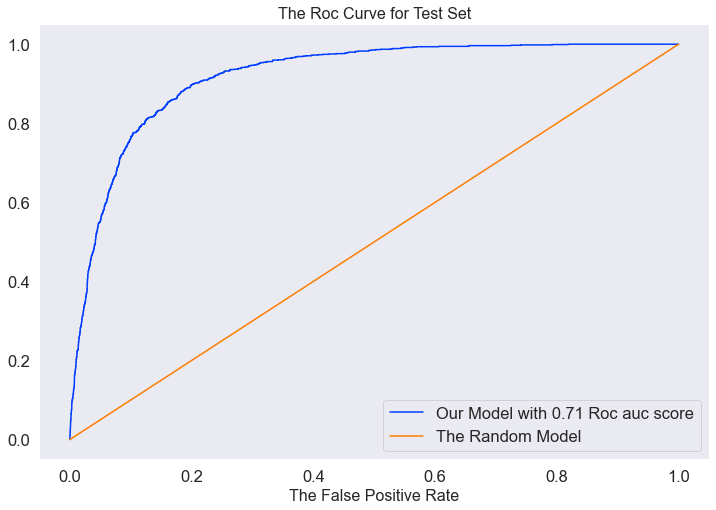

In [30]:
y_pred_proba_train = model_xg.predict_proba(X_train)[:,1]
y_pred_proba_test = model_xg.predict_proba(X_test)[:,1]

roc_curve_func(y_pred_train , y_pred_test , y_pred_proba_train , y_pred_proba_test)

# Thresholding method for increasing recall

In [31]:
def threshold(model_name) :
    recall_scores =  [recall_score(y_true = y_test, y_pred = np.where(model_name.predict_proba(X = X_test)[:, 1] >= proba, 1, 0), pos_label = 1) for proba in np.arange(start = 0.0, stop = 1.01, step = 0.01)]
    precision_scores =  [precision_score(y_true = y_test, y_pred = np.where(model_name.predict_proba(X = X_test)[:, 1] >= proba, 1, 0), pos_label = 1) for proba in np.arange(start = 0.0, stop = 1.01, step = 0.01)]
    plt.plot(np.arange(start = 0.0, stop = 1.01, step = 0.01), recall_scores, label = 'Positive Recall Score', c = 'darkorange')
    plt.plot(np.arange(start = 0.0, stop = 1.01, step = 0.01), precision_scores, label = 'Positive Precision Score', c = 'teal')
    plt.title(label = 'Thresholding for Positive Recall & Precision Score', fontsize = 16)
    plt.axvline(0.5, label = 'Default Threshold', c = 'grey')
    plt.ylabel(ylabel = 'Positive Recall & Precision Score', fontsize = 16)
    plt.xlabel(xlabel = 'Probabilities', fontsize = 16)
    plt.legend(loc = 'best', fontsize = 16)
    plt.grid()
    plt.show()

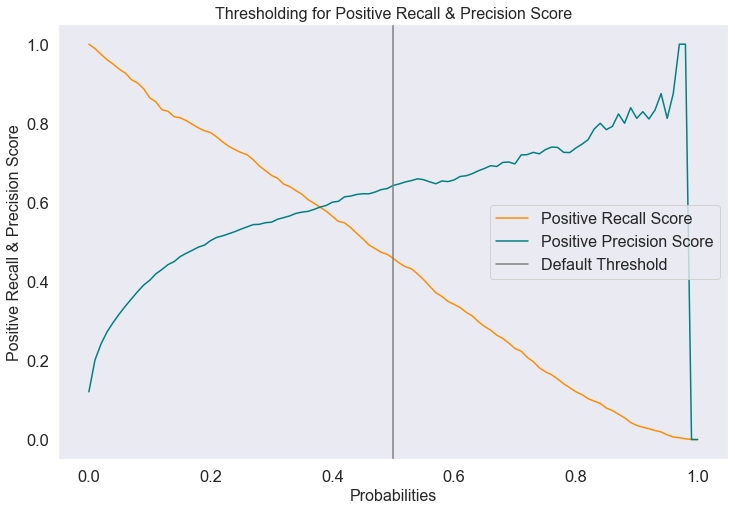

In [32]:
threshold(model_name = model_xg)

# Metrics after thresholding method

In [33]:
y_pred_train = np.where(model_xg.predict_proba(X_train)[:,1] > 0.15,  1,0)
y_pred_test = np.where(model_xg.predict_proba(X_test)[:,1] > 0.15 , 1,0)

metrics_func(y_pred_train=y_pred_train , y_pred_test = y_pred_test)

<<< The metrics for Train set >>>
The Roc auc score is 89.42%
The Gini score is 78.84%
The F1 score is 64.63%
The Precision Score is 50.22%
The Recall score is 90.64%
The Balance accuracy score is 89.42%
The Accuracy score is 88.48%

<<< The metrics for Ttest set >>>
The Roc auc score is 84.21%
The Gini score is 68.43%
The F1 score is 59.00%
The Precision Score is 46.27%
The Recall score is 81.39%
The Balance accuracy score is 84.21%
The Accuracy score is 86.35%


# Confussion matrices after thresholding method

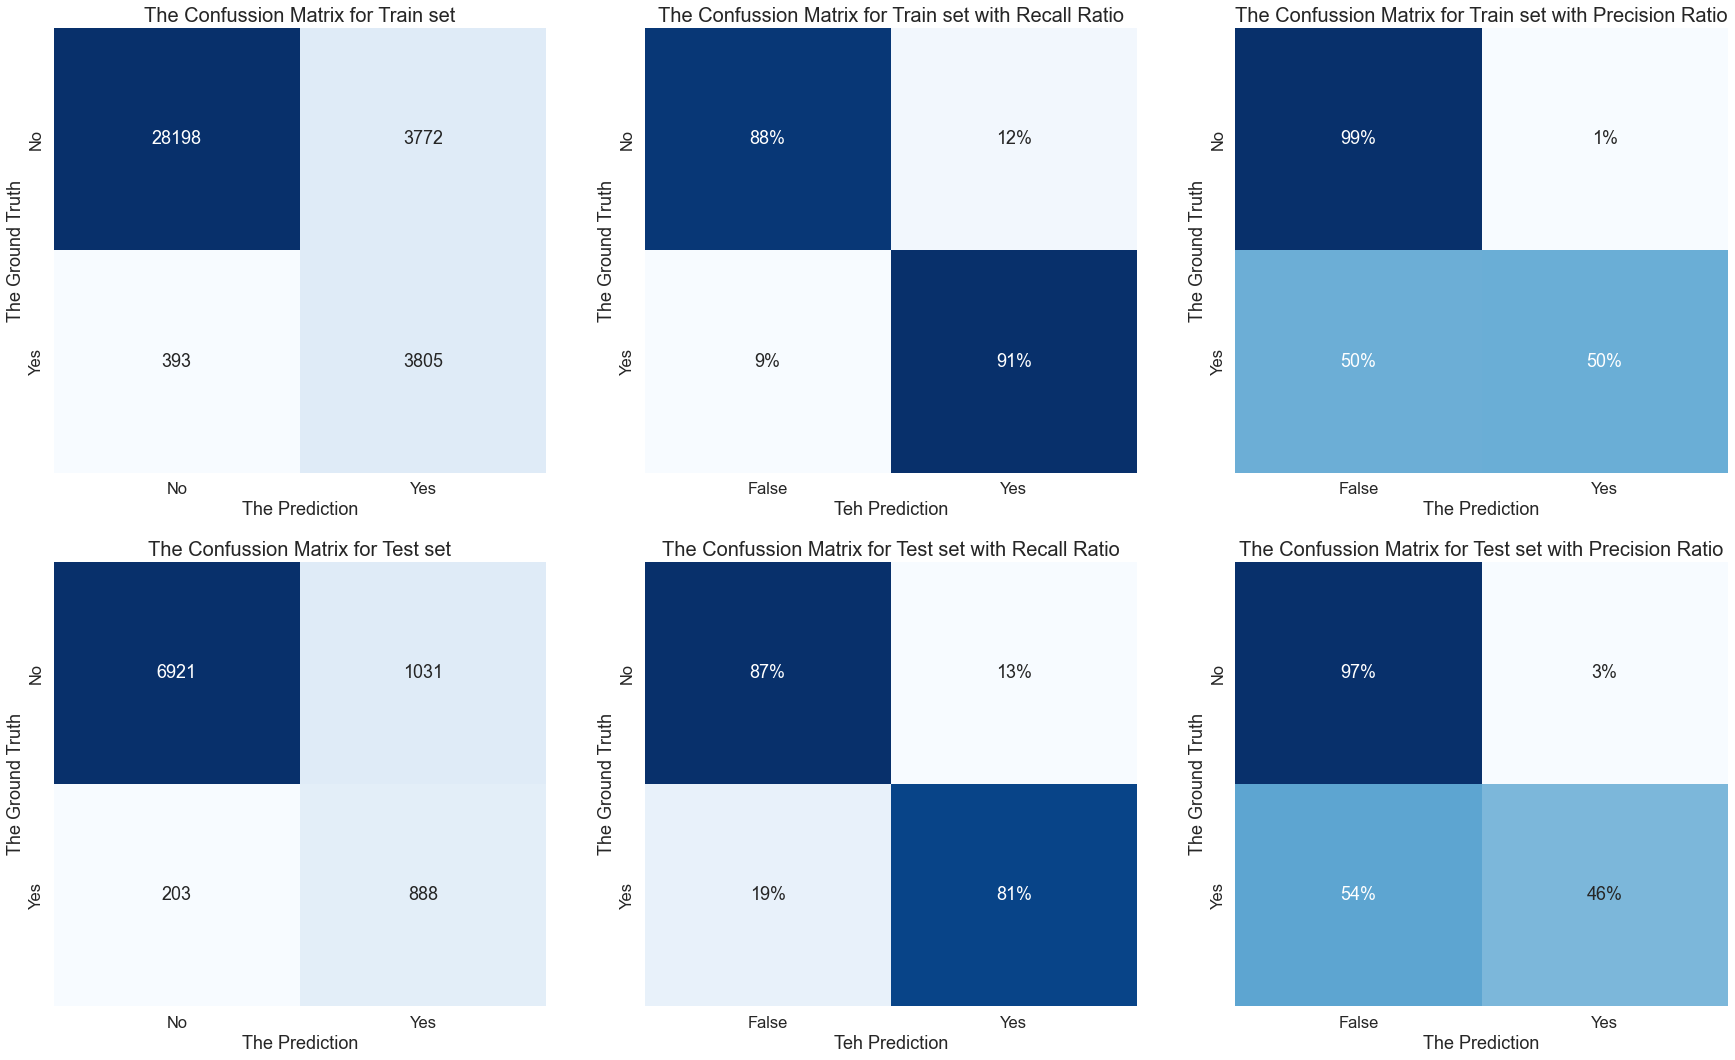

In [34]:
confussion_matrix_func(y_pred_train , y_pred_test)

# Roc Curve after thresholding method

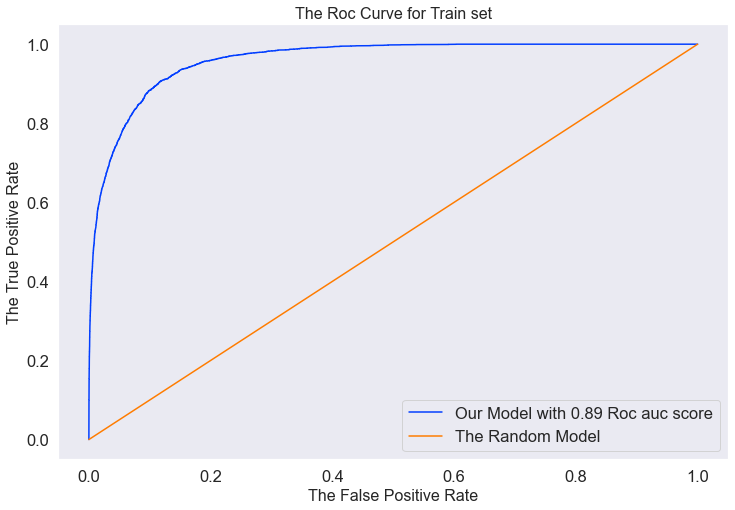

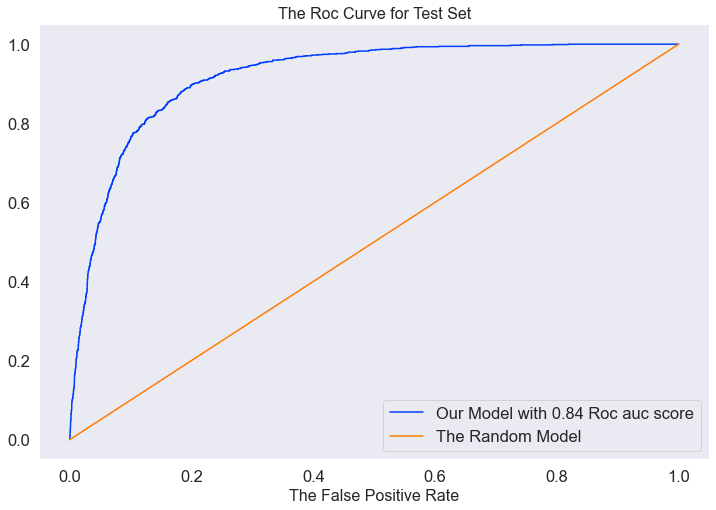

In [35]:
roc_curve_func(y_pred_train , y_pred_test , y_pred_proba_train , y_pred_proba_test)

# Saving model with pickle

In [36]:
import pickle

file_name = 'Model'

pickle.dump(model_xg , open(file_name , "wb"))